In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
df_test = pd.read_csv("test.csv",index_col=0)

In [3]:
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearB

In [5]:
df_train = pd.read_csv("train.csv",index_col=0)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [7]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
df_train.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [9]:
#gestion des nan

In [10]:
df_train["LotFrontage"].value_counts(dropna=False)

NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
137.0      1
38.0       1
33.0       1
150.0      1
46.0       1
Name: LotFrontage, Length: 111, dtype: int64

In [11]:
df_train["LotFrontage"].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

In [12]:
#Au vue de la définition de cette variable les nan doivent être changé en 0 (pas de rue connectée)
df_train["LotFrontage"] = df_train["LotFrontage"].fillna(0.)

In [13]:
df_train["Alley"].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [14]:
#au vue de la définition les nan devrait être des "sans" 
df_train["Alley"] = df_train["Alley"].fillna("NoAl")

In [15]:
df_train["MasVnrType"].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [16]:
df_train["MasVnrArea"].unique()

array([1.960e+02, 0.000e+00, 1.620e+02, 3.500e+02, 1.860e+02, 2.400e+02,
       2.860e+02, 3.060e+02, 2.120e+02, 1.800e+02, 3.800e+02, 2.810e+02,
       6.400e+02, 2.000e+02, 2.460e+02, 1.320e+02, 6.500e+02, 1.010e+02,
       4.120e+02, 2.720e+02, 4.560e+02, 1.031e+03, 1.780e+02, 5.730e+02,
       3.440e+02, 2.870e+02, 1.670e+02, 1.115e+03, 4.000e+01, 1.040e+02,
       5.760e+02, 4.430e+02, 4.680e+02, 6.600e+01, 2.200e+01, 2.840e+02,
       7.600e+01, 2.030e+02, 6.800e+01, 1.830e+02, 4.800e+01, 2.800e+01,
       3.360e+02, 6.000e+02, 7.680e+02, 4.800e+02, 2.200e+02, 1.840e+02,
       1.129e+03, 1.160e+02, 1.350e+02, 2.660e+02, 8.500e+01, 3.090e+02,
       1.360e+02, 2.880e+02, 7.000e+01, 3.200e+02, 5.000e+01, 1.200e+02,
       4.360e+02, 2.520e+02, 8.400e+01, 6.640e+02, 2.260e+02, 3.000e+02,
       6.530e+02, 1.120e+02, 4.910e+02, 2.680e+02, 7.480e+02, 9.800e+01,
       2.750e+02, 1.380e+02, 2.050e+02, 2.620e+02, 1.280e+02, 2.600e+02,
       1.530e+02, 6.400e+01, 3.120e+02, 1.600e+01, 

In [17]:
records = df_train[df_train["MasVnrType"].isna()==True]
records["MasVnrArea"]

Id
235    NaN
530    NaN
651    NaN
937    NaN
974    NaN
978    NaN
1244   NaN
1279   NaN
Name: MasVnrArea, dtype: float64

In [18]:
#Donc avec les definitions, on choisi nan -> "None" et NaN ->0.000e00
df_train["MasVnrType"] = df_train["MasVnrType"].fillna("None")
df_train["MasVnrArea"] = df_train["MasVnrArea"].fillna(0.0e+00)

In [19]:
df_train["MasVnrType"].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object)

In [20]:
df_train["MasVnrArea"].value_counts(dropna=False)

0.0      869
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [21]:
 #BsmtQual       1423 non-null   object 
 #30  BsmtCond       1423 non-null   object 
 #31  BsmtExposure   1422 non-null   object 
 #32  BsmtFinType1   1423 non-null   object 
 #33  BsmtFinSF1     1460 non-null   int64  
 #34  BsmtFinType2   1422 non-null   object

In [22]:
df_train["BsmtQual"].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [23]:
df_train["BsmtCond"].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [24]:
df_train["BsmtExposure"].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [25]:
df_train["BsmtFinType1"].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [26]:
df_train["BsmtFinType2"].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [27]:
df_train[df_train["BsmtExposure"].isna() == True][["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
Id,,,,,
18,NaN,NaN,NaN,NaN,NaN
40,NaN,NaN,NaN,NaN,NaN
91,NaN,NaN,NaN,NaN,NaN
103,NaN,NaN,NaN,NaN,NaN
157,NaN,NaN,NaN,NaN,NaN
183,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN
343,NaN,NaN,NaN,NaN,NaN
363,NaN,NaN,NaN,NaN,NaN


In [28]:
#par rapport au définition tous ces NaN ne sont des non définis mais une absence de l'objet considéré
#donc création d'une variable "No"

In [29]:
df_train["BsmtQual"]=df_train["BsmtQual"].fillna("No")
df_train["BsmtCond"]=df_train["BsmtCond"].fillna("No")
df_train["BsmtExposure"]=df_train["BsmtExposure"].fillna("No")
df_train["BsmtFinType1"]=df_train["BsmtFinType1"].fillna("No")
df_train["BsmtFinType2"]=df_train["BsmtFinType2"].fillna("No")

In [30]:
df_train["BsmtExposure"].unique()

array(['No', 'Gd', 'Mn', 'Av'], dtype=object)

In [31]:
df_train["BsmtQual"].unique()

array(['Gd', 'TA', 'Ex', 'No', 'Fa'], dtype=object)

In [32]:
# 41  Electrical     1459 non-null   object 

In [33]:
df_train["Electrical"].unique()
# La définition n'aide pas pour ce NaN

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [34]:
df_train[df_train["Electrical"].isna()==True]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1380,80,RL,73.0,9735,Pave,NoAl,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [35]:
df_train["Electrical"].value_counts(dropna=False)

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64

In [36]:
#Considérons une erreur de saisie. remplacement par la valeur la plus présente vus le déséquilibre des valeurs
df_train["Electrical"]=df_train["Electrical"].fillna("SBrkr")

In [37]:
df_train["Electrical"].value_counts(dropna=False)

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [38]:
 #55  Fireplaces     1460 non-null   int64  
 #56  FireplaceQu    770 non-null    object 
df_train["FireplaceQu"].value_counts(dropna=False)

NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

In [39]:
#par la définition on a Nan-> No
df_train["FireplaceQu"]= df_train["FireplaceQu"].fillna("No")

In [40]:
 #57  GarageType     1379 non-null   object 
 #58  GarageYrBlt    1379 non-null   float64
 #59  GarageFinish   1379 non-null   object 
 #60  GarageCars     1460 non-null   int64  
 #61  GarageArea     1460 non-null   int64  
 #62  GarageQual     1379 non-null   object 
 #63  GarageCond     1379 non-null   object 
#Usage de la définition Nan-> No et YrBlt ->0.0?

In [41]:
df_train["GarageType"]= df_train["GarageType"].fillna("No")
df_train["GarageYrBlt"]= df_train["GarageYrBlt"].fillna(0.0e0)
df_train["GarageFinish"]= df_train["GarageFinish"].fillna("No")
df_train["GarageQual"]= df_train["GarageQual"].fillna("No")
df_train["GarageCond"]= df_train["GarageCond"].fillna("No")

In [42]:
# 70  PoolArea       1460 non-null   int64  
# 71  PoolQC         7 non-null      object 
# 72  Fence          281 non-null    object 
# 73  MiscFeature    54 non-null     object 
# 74  MiscVal        1460 non-null   int64  
# Par définition nan -> No

In [43]:
df_train["PoolQC"]= df_train["PoolQC"].fillna("No")
df_train["Fence"]= df_train["Fence"].fillna("No")
df_train["MiscFeature"]= df_train["MiscFeature"].fillna("No")

In [44]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [45]:
# Nan pour le profil test basé sur la gestion de train

df_test["LotFrontage"] = df_test["LotFrontage"].fillna(0.)
df_test["Alley"] = df_test["Alley"].fillna("NoAl")
df_test["MasVnrType"] = df_test["MasVnrType"].fillna("None")
df_test["MasVnrArea"] = df_test["MasVnrArea"].fillna(0.0e+00)
df_test["BsmtQual"]=df_test["BsmtQual"].fillna("No")
df_test["BsmtCond"]=df_test["BsmtCond"].fillna("No")
df_test["BsmtExposure"]=df_test["BsmtExposure"].fillna("No")
df_test["BsmtFinType1"]=df_test["BsmtFinType1"].fillna("No")
df_test["BsmtFinType2"]=df_test["BsmtFinType2"].fillna("No")
df_test["Electrical"]=df_test["Electrical"].fillna("SBrkr")
df_test["FireplaceQu"]= df_test["FireplaceQu"].fillna("No")
df_test["GarageType"]= df_test["GarageType"].fillna("No")
df_test["GarageYrBlt"]= df_test["GarageYrBlt"].fillna(0.0e0)
df_test["GarageFinish"]= df_test["GarageFinish"].fillna("No")
df_test["GarageQual"]= df_test["GarageQual"].fillna("No")
df_test["GarageCond"]= df_test["GarageCond"].fillna("No")
df_test["PoolQC"]= df_test["PoolQC"].fillna("No")
df_test["Fence"]= df_test["Fence"].fillna("No")
df_test["MiscFeature"]= df_test["MiscFeature"].fillna("No")

In [46]:
#Vérification de présence de Nan dans test
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearB

In [47]:
# Il manque des valeurs en plus dans le test (non géré par mes choix pour train)
# A faire MSZoning - Utilities - Exterior1st - Exterior2nd - BsmtFinSF1 - BsmtFinSF2 - BsmtUnfSF -TotalBsmtSF
# BsmtFullBath - BsmtHalfBath - KitchenQual - Functional - GarageCars - GarageArea - SaleType

In [48]:
df_test["MSZoning"].value_counts(dropna=False)

RL         1114
RM          242
FV           74
C (all)      15
RH           10
NaN           4
Name: MSZoning, dtype: int64

In [49]:
df_train["MSZoning"].value_counts(dropna=False)

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [50]:
# Au vue du déséquilibre de la variable nan-> RL
df_test["MSZoning"] =df_test["MSZoning"].fillna("RL")

In [51]:
df_test["Utilities"].value_counts(dropna=False)

AllPub    1457
NaN          2
Name: Utilities, dtype: int64

In [52]:
df_train["Utilities"].value_counts(dropna=False)

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [53]:
#Au vue du déséquilibre de la variable nan-> AllPub
df_test["Utilities"] =df_test["Utilities"].fillna("AllPub")

In [54]:
df_test["Exterior1st"].value_counts(dropna=False)

VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
AsphShn      1
NaN          1
CBlock       1
Name: Exterior1st, dtype: int64

In [55]:
#Au vue du déséquilibre nan->VinylSd
df_test["Exterior1st"]=df_test["Exterior1st"].fillna("VinylSd")

In [56]:
df_test["Exterior2nd"].value_counts(dropna=False)

VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
AsphShn      1
NaN          1
Stone        1
Name: Exterior2nd, dtype: int64

In [57]:
df_test["Exterior2nd"]=df_test["Exterior2nd"].fillna("VinylSd")

In [58]:
#liste des Bsmt
records = df_test[df_test["BsmtFinSF1"].isna() == True]
records[["BsmtFinSF1","BsmtFinType2","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF"]]

,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
Id,,,,,
2121,NaN,No,NaN,NaN,NaN


In [59]:
# Bon au vu des définitions, on prend Nan->0
df_test["BsmtFinSF1"] = df_test["BsmtFinSF1"].fillna(0.)
df_test["BsmtFinSF2"] = df_test["BsmtFinSF2"].fillna(0.)
df_test["BsmtUnfSF"] = df_test["BsmtUnfSF"].fillna(0.)
df_test["TotalBsmtSF"] = df_test["TotalBsmtSF"].fillna(0.)

In [60]:
df_test["BsmtFullBath"].value_counts(dropna=False)

0.0    849
1.0    584
2.0     23
NaN      2
3.0      1
Name: BsmtFullBath, dtype: int64

In [61]:
df_test["BsmtHalfBath"].value_counts(dropna=False)

0.0    1364
1.0      91
NaN       2
2.0       2
Name: BsmtHalfBath, dtype: int64

In [62]:
#Déséquilibre et logique Nan-> 0
df_test["BsmtFullBath"] = df_test["BsmtFullBath"].fillna(0.)
df_test["BsmtHalfBath"] = df_test["BsmtHalfBath"].fillna(0.)

In [63]:
df_test["KitchenQual"].value_counts(dropna=False)

TA     757
Gd     565
Ex     105
Fa      31
NaN      1
Name: KitchenQual, dtype: int64

In [64]:
# Bon on va prendre la modalitée médiane TA
df_test["KitchenQual"]=df_test["KitchenQual"].fillna("TA")

In [65]:
df_test["Functional"].value_counts(dropna=False)

Typ     1357
Min2      36
Min1      34
Mod       20
Maj1       5
Maj2       4
NaN        2
Sev        1
Name: Functional, dtype: int64

In [66]:
#très déséquilibré Nan-> Typ
df_test["Functional"] = df_test["Functional"].fillna("Typ")

In [67]:
df_test["GarageCars"].value_counts(dropna=False)

2.0    770
1.0    407
3.0    193
0.0     76
4.0     11
5.0      1
NaN      1
Name: GarageCars, dtype: int64

In [68]:
df_test["GarageArea"].unique()

array([ 730.,  312.,  482.,  470.,  506.,  440.,  420.,  393.,  525.,
        511.,  264.,  320.,  308.,  751.,  868.,  678.,  958.,  756.,
        484.,  430.,  437.,  400.,  433.,  962.,  880.,  676.,  528.,
        429.,  461.,  762.,  713.,  588.,  480.,  496.,  852.,  592.,
        596.,  535.,  660.,  441.,  490.,  504.,  517.,    0.,  315.,
        576.,  620.,  263.,  318.,  305.,  280.,  240.,  551.,  780.,
        288.,  624.,  363.,  200.,  572.,  180.,  365.,  231.,  450.,
        416.,  591.,  690.,  522.,  467.,  209.,  366., 1017.,  615.,
        580.,  513.,  850.,  621.,  319.,  336.,  352.,  260.,  399.,
        473.,  598.,  531.,  625.,  330.,  741.,  776.,  520.,  686.,
        253.,  286.,  495.,  616.,  275.,  502.,  632.,  390.,  564.,
        396.,  409.,  567.,  529.,  479.,  581.,  565.,  478.,  477.,
        345.,  656.,  754.,  864.,  896.,  834.,  932.,  640.,  927.,
        700.,  583.,  886.,  871.,  949.,  685.,  649.,  539.,  701.,
        392.,  397.,

In [69]:
df_test[df_test["GarageCars"].isna()==True][["GarageType","GarageYrBlt","GarageFinish","GarageCars","GarageArea"]]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea
Id,,,,,
2577,Detchd,0.0,No,NaN,NaN


In [70]:
#Par coherence on va vers nan-> 0.0
df_test["GarageCars"] = df_test["GarageCars"].fillna(0.0)
df_test["GarageArea"] = df_test["GarageArea"].fillna(0.)

In [71]:
df_test["SaleType"].value_counts(dropna=False)

WD       1258
New       117
COD        44
ConLD      17
CWD         8
Oth         4
ConLI       4
Con         3
ConLw       3
NaN         1
Name: SaleType, dtype: int64

In [72]:
#bon vus le déséquilbre nan->WD
df_test["SaleType"] = df_test["SaleType"].fillna("WD")

In [73]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearB

In [74]:
# chosir les variables / discretisation


In [75]:
#0   MSSubClass        int64  
df_train["MSSubClass"].value_counts()
#besoin d'une standardisation

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [76]:
# 1   MSZoning        object 
df_train["MSZoning"].value_counts()


RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [77]:
df_train["MSZoning"] = df_train["MSZoning"].replace(["A","C (all)","FV","I","RH","RL","RP","RM"],[0,1,2,3,4,5,6,7])
df_train["MSZoning"].value_counts()

5    1151
7     218
2      65
4      16
1      10
Name: MSZoning, dtype: int64

In [78]:
# 2   LotFrontage    float64
df_train["LotFrontage"].value_counts()
#df_train["LotFrontage"].unique()

0.0      259
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
137.0      1
38.0       1
33.0       1
150.0      1
46.0       1
Name: LotFrontage, Length: 111, dtype: int64

In [79]:
df_train["LotFrontage"]=pd.cut(x=df_train["LotFrontage"],bins=[-1.0,0.0,50.0,100.0,150.0,500.],labels=[0,1,2,3,4])

In [80]:
df_train["LotFrontage"].value_counts()

2    912
0    259
1    205
3     75
4      9
Name: LotFrontage, dtype: int64

In [81]:
# 3   LotArea        int64  
df_train["LotArea"].value_counts()
df_test["LotArea"].value_counts()

9600     20
7200     18
6000     17
9000     15
7500     12
         ..
12304     1
8232      1
2448      1
9024      1
10441     1
Name: LotArea, Length: 1106, dtype: int64

In [82]:
df_train["LotArea"].value_counts(bins=5)

(1086.054, 44089.0]     1447
(44089.0, 86878.0]         9
(129667.0, 172456.0]       2
(86878.0, 129667.0]        1
(172456.0, 215245.0]       1
Name: LotArea, dtype: int64

In [83]:
df_test["LotArea"].value_counts(bins=5)

(1414.869, 12496.0]    1198
(12496.0, 23522.0]      240
(23522.0, 34548.0]       12
(45574.0, 56600.0]        5
(34548.0, 45574.0]        4
Name: LotArea, dtype: int64

In [84]:
df_train["LotArea"]=pd.cut(x=df_train["LotArea"],bins=[0.0,10000.0,20000.0,30000.0,50000.0,1000000.0],labels=[0,1,2,3,4])

In [85]:
df_train["LotArea"].value_counts()

0    842
1    565
2     31
3     11
4     11
Name: LotArea, dtype: int64

In [86]:
# 4   Street         object 
df_train["Street"].value_counts()
df_test["Street"].value_counts()

Pave    1453
Grvl       6
Name: Street, dtype: int64

In [87]:
df_train["Street"]=df_train["Street"].replace(["Pave","Grvl"],[0,1])

In [88]:
df_train["Street"].value_counts()

0    1454
1       6
Name: Street, dtype: int64

In [89]:
# 5   Alley          object 
df_train["Alley"].value_counts()

NoAl    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [90]:
df_train["Alley"]=df_train["Alley"].replace(["NoAl","Grvl","Pave"],[0,1,2])
df_train["Alley"].value_counts()

0    1369
1      50
2      41
Name: Alley, dtype: int64

In [91]:
# 6   LotShape       object 
df_train["LotShape"].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [92]:
df_train["LotShape"]=df_train["LotShape"].replace(["Reg","IR1","IR2","IR3"],[0,1,2,3])
df_train["LotShape"].value_counts()

0    925
1    484
2     41
3     10
Name: LotShape, dtype: int64

In [93]:
# 7   LandContour     object 
df_train["LandContour"].value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [94]:
df_train["LandContour"]=df_train["LandContour"].replace(["Lvl","Bnk","HLS","Low"],[0,1,2,3])
df_train["LandContour"].value_counts()

0    1311
1      63
2      50
3      36
Name: LandContour, dtype: int64

In [95]:
# 8   Utilities    object 
df_train["Utilities"].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [96]:
df_train["Utilities"]=df_train["Utilities"].replace(["AllPub","NoSeWr","NoSeWa","ELO"],[0,1,2,3])
df_train["Utilities"].value_counts()

0    1459
2       1
Name: Utilities, dtype: int64

In [97]:
# 9   LotConfig      object 
df_train["LotConfig"].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [98]:
df_train["LotConfig"]=df_train["LotConfig"].replace(["Inside","Corner","CulDSac","FR2","FR3"],[0,1,2,3,4])
df_train["LotConfig"].value_counts()

0    1052
1     263
2      94
3      47
4       4
Name: LotConfig, dtype: int64

In [99]:
# 10  LandSlope      object 
df_train["LandSlope"].value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [100]:
df_train["LandSlope"]=df_train["LandSlope"].replace(["Gtl","Mod","Sev"],[0,1,2])
df_train["LandSlope"].value_counts()

0    1382
1      65
2      13
Name: LandSlope, dtype: int64

In [101]:
# 11  Neighborhood    object 
df_train["Neighborhood"].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [102]:
df_train["Neighborhood"]=df_train["Neighborhood"].replace(["Blmngtn","Blueste","BrDale","BrkSide","ClearCr","CollgCr",
                                                           "Crawfor","Edwards","Gilbert","IDOTRR","MeadowV","Mitchel",
                                                           "NAmes","NoRidge","NPkVill","NridgHt","NWAmes","OldTown",
                                                          "SWISU","Sawyer","SawyerW","Somerst","StoneBr","Timber","Veenker"]
                                                          ,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
df_train["Neighborhood"].value_counts()

12    225
5     150
17    113
7     100
21     86
8      79
15     77
19     74
16     73
20     59
3      58
6      51
11     49
13     41
23     38
9      37
4      28
22     25
18     25
10     17
0      17
2      16
24     11
14      9
1       2
Name: Neighborhood, dtype: int64

In [103]:
# 12  Condition1     object 
df_train["Condition1"].value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [104]:
df_train["Condition1"]=df_train["Condition1"].replace(["Norm","Feedr","Artery","RRAn","PosN","RRAe","PosA","RRNn","RRNe"],
                                                      [0,1,2,3,4,5,6,7,8])
df_train["Condition1"].value_counts()

0    1260
1      81
2      48
3      26
4      19
5      11
6       8
7       5
8       2
Name: Condition1, dtype: int64

In [105]:
# 13  Condition2     object 
df_train["Condition2"].value_counts()

Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

In [106]:
df_train["Condition2"]=df_train["Condition2"].replace(["Norm","Feedr","Artery","RRAn","PosN","RRAe","PosA","RRNn","RRNe"],
                                                      [0,1,2,3,4,5,6,7,8])
df_train["Condition2"].value_counts()

0    1445
1       6
2       2
7       2
4       2
6       1
3       1
5       1
Name: Condition2, dtype: int64

In [107]:
# 14  BldgType      object 
df_train["BldgType"].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [108]:
df_train["BldgType"]=df_train["BldgType"].replace(["1Fam","TwnhsE","Duplex","Twnhs","2fmCon"],[0,1,2,3,4])
df_train["BldgType"].value_counts()

0    1220
1     114
2      52
3      43
4      31
Name: BldgType, dtype: int64

In [109]:
# 15  HouseStyle    object 
df_train["HouseStyle"].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [110]:
df_train["HouseStyle"]=df_train["HouseStyle"].replace(["1Story","1.5Fin","1.5Unf","2Story","2.5Fin","2.5Unf","SFoyer","SLvl"],
                                                      [0,1,2,3,4,5,6,7])
df_train["HouseStyle"].value_counts()

0    726
3    445
1    154
7     65
6     37
2     14
5     11
4      8
Name: HouseStyle, dtype: int64

In [111]:
# 16  OverallQual    int64  
df_train["OverallQual"].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [112]:
# 17  OverallCond     int64  
df_train["OverallCond"].value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

In [113]:
# 18  YearBuilt        int64  
df_train["YearBuilt"].value_counts(bins=5)

(1982.4, 2010.0]      591
(1954.8, 1982.4]      484
(1927.2, 1954.8]      211
(1899.6, 1927.2]      159
(1871.861, 1899.6]     15
Name: YearBuilt, dtype: int64

In [114]:
df_test["YearBuilt"].value_counts(bins=5)

(1983.8, 2010.0]      595
(1957.6, 1983.8]      418
(1931.4, 1957.6]      241
(1905.2, 1931.4]      170
(1878.868, 1905.2]     35
Name: YearBuilt, dtype: int64

In [115]:
df_train["YearBuilt"]=pd.cut(x=df_train["YearBuilt"],bins=[1870.0,1900.0,1930.0,1960,1990.0,2020.0],labels=[0,1,2,3,4])
df_train["YearBuilt"].value_counts()

4    539
3    419
2    308
1    169
0     25
Name: YearBuilt, dtype: int64

In [116]:
# 19  YearRemodAdd   int64  
df_train["YearRemodAdd"].value_counts()

1950    178
2006     97
2007     76
2005     73
2004     62
       ... 
2010      6
1986      5
1952      5
1983      5
1951      4
Name: YearRemodAdd, Length: 61, dtype: int64

In [117]:
df_train["YearRemodAdd"]=pd.cut(x=df_train["YearRemodAdd"],bins=[1870.0,1900.0,1930.0,1960,1990.0,2020.0],labels=[0,1,2,3,4])
df_train["YearRemodAdd"].value_counts()

4    782
3    394
2    284
0      0
1      0
Name: YearRemodAdd, dtype: int64

In [118]:
# 20  RoofStyle      object 
df_train["RoofStyle"].value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [119]:
df_train["RoofStyle"]=df_train["RoofStyle"].replace(["Flat","Gable","Gambrel","Hip","Mansard","Shed"],[0,1,2,3,4,5])
df_train["RoofStyle"].value_counts()

1    1141
3     286
0      13
2      11
4       7
5       2
Name: RoofStyle, dtype: int64

In [120]:
#21  RoofMatl       object 
df_train["RoofMatl"].value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64

In [121]:
df_train["RoofMatl"]=df_train["RoofMatl"].replace(["ClyTile","CompShg","Membran","Metal","Roll","Tar&Grv","WdShake","WdShngl"]
                                                  ,[0,1,2,3,4,5,6,7])
df_train["RoofMatl"].value_counts()

1    1434
5      11
7       6
6       5
3       1
2       1
4       1
0       1
Name: RoofMatl, dtype: int64

In [122]:
# 22  Exterior1st  object 
df_train["Exterior1st"].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

In [123]:
list=["AsbShng","AsphShn","BrkComm","BrkFace","CBlock","CemntBd","HdBoard","ImStucc","MetalSd","Other","Plywood","PreCast"
      ,"Stone","Stucco","VinylSd","Wd Sdng","WdShing"]
df_train["Exterior1st"] = df_train["Exterior1st"].replace(list,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
df_train["Exterior1st"].value_counts()

14    515
6     222
8     220
15    206
10    108
5      61
3      50
16     26
13     25
0      20
2       2
12      2
1       1
7       1
4       1
Name: Exterior1st, dtype: int64

In [124]:
#23  Exterior2nd     object 
df_train["Exterior2nd"].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [125]:
list2=["AsbShng","AsphShn","Brk Cmn","BrkFace","CBlock","CmentBd","HdBoard","ImStucc","MetalSd","Other","Plywood","PreCast"
      ,"Stone","Stucco","VinylSd","Wd Sdng","Wd Shng"]
df_train["Exterior2nd"] = df_train["Exterior2nd"].replace(list2,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
df_train["Exterior2nd"].value_counts()
#note vérifier ces changements pour test

14    504
8     214
6     207
15    197
10    142
5      60
16     38
13     26
3      25
0      20
7      10
2       7
12      5
1       3
9       1
4       1
Name: Exterior2nd, dtype: int64

In [126]:
# 24  MasVnrType  object 
df_train["MasVnrType"].value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [127]:
df_train["MasVnrType"]= df_train["MasVnrType"].replace(["BrkCmn","BrkFace","CBlock","None","Stone"],[0,1,2,3,4])
df_train["MasVnrType"].value_counts()

3    872
1    445
4    128
0     15
Name: MasVnrType, dtype: int64

In [128]:
#25  MasVnrArea    float64
df_train["MasVnrArea"].value_counts(bins = 5)
#df_test["MasVnrArea"].value_counts(bins = 5)

(-1.601, 320.0]     1309
(320.0, 640.0]       119
(640.0, 960.0]        24
(960.0, 1280.0]        6
(1280.0, 1600.0]       2
Name: MasVnrArea, dtype: int64

In [129]:
df_train["MasVnrArea"] = pd.cut(x=df_train["MasVnrArea"],bins=[-2.0,0.1,250.0,500.0,1000.0,2000.0],labels=[0,1,2,3,4])
df_train["MasVnrArea"].value_counts()

0    869
1    358
2    176
3     50
4      7
Name: MasVnrArea, dtype: int64

In [130]:
# 26  ExterQual     object 
df_train["ExterQual"].value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [131]:
df_train["ExterQual"]=df_train["ExterQual"].replace(["Ex","Gd","TA","Fa","Po"],[0,1,2,3,4])
df_train["ExterQual"].value_counts()

2    906
1    488
0     52
3     14
Name: ExterQual, dtype: int64

In [132]:
# 27  ExterCond      object 
df_train["ExterCond"].value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [133]:
df_train["ExterCond"]=df_train["ExterCond"].replace(["Ex","Gd","TA","Fa","Po"],[0,1,2,3,4])
df_train["ExterCond"].value_counts()

2    1282
1     146
3      28
0       3
4       1
Name: ExterCond, dtype: int64

In [134]:
#28  Foundation     object 
df_train["Foundation"].value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [135]:
df_train["Foundation"]=df_train["Foundation"].replace(["BrkTil","CBlock","PConc","Slab","Stone","Wood"],[0,1,2,3,4,5])
df_train["Foundation"].value_counts()

2    647
1    634
0    146
3     24
4      6
5      3
Name: Foundation, dtype: int64

In [136]:
# 29  BsmtQual     object 
df_train["BsmtQual"].value_counts()

TA    649
Gd    618
Ex    121
No     37
Fa     35
Name: BsmtQual, dtype: int64

In [137]:
df_train["BsmtQual"]=df_train["BsmtQual"].replace(["Ex","Gd","TA","Fa","Po","No"],[0,1,2,3,4,5])
df_train["BsmtQual"].value_counts()

2    649
1    618
0    121
5     37
3     35
Name: BsmtQual, dtype: int64

In [138]:
# 30  BsmtCond     object 
df_train["BsmtCond"].value_counts()

TA    1311
Gd      65
Fa      45
No      37
Po       2
Name: BsmtCond, dtype: int64

In [139]:
df_train["BsmtCond"]=df_train["BsmtCond"].replace(["Ex","Gd","TA","Fa","Po","No"],[0,1,2,3,4,5])
df_train["BsmtCond"].value_counts()

2    1311
1      65
3      45
5      37
4       2
Name: BsmtCond, dtype: int64

In [140]:
# 31  BsmtExposure  object 
df_train["BsmtExposure"].value_counts()

No    991
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [141]:
df_train["BsmtExposure"]=df_train["BsmtExposure"].replace(["Gd","Av","Mn","No"],[0,1,2,3])
df_train["BsmtExposure"].value_counts()

3    991
1    221
0    134
2    114
Name: BsmtExposure, dtype: int64

In [142]:
 #32  BsmtFinType1   object 
df_train["BsmtFinType1"].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
No      37
Name: BsmtFinType1, dtype: int64

In [143]:
df_train["BsmtFinType1"]=df_train["BsmtFinType1"].replace(["GLQ","ALQ","BLQ","Rec","LwQ","Unf","No"],[0,1,2,3,4,5,6])
df_train["BsmtFinType1"].value_counts()

5    430
0    418
1    220
2    148
3    133
4     74
6     37
Name: BsmtFinType1, dtype: int64

In [144]:
# 33  BsmtFinSF1    float64
df_train["BsmtFinSF1"].value_counts(bins = 5)
#df_test["BsmtFinSF1"].value_counts(bins=5)

(-5.6450000000000005, 1128.8]    1336
(1128.8, 2257.6]                  122
(2257.6, 3386.4]                    1
(4515.2, 5644.0]                    1
(3386.4, 4515.2]                    0
Name: BsmtFinSF1, dtype: int64

In [145]:
df_train["BsmtFinSF1"] = pd.cut(x=df_train["BsmtFinSF1"],bins=[-10.0,0.5,500.,1000.,2000.0,10000.0],labels=[0,1,2,3,4])
df_train["BsmtFinSF1"].value_counts()

0    467
2    435
1    380
3    174
4      4
Name: BsmtFinSF1, dtype: int64

In [146]:
# 34  BsmtFinType2   object 
df_train["BsmtFinType2"].value_counts()

Unf    1256
Rec      54
LwQ      46
No       38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [147]:
df_train["BsmtFinType2"]=df_train["BsmtFinType2"].replace(["GLQ","ALQ","BLQ","Rec","LwQ","Unf","No"],[0,1,2,3,4,5,6])
df_train["BsmtFinType2"].value_counts()

5    1256
3      54
4      46
6      38
2      33
1      19
0      14
Name: BsmtFinType2, dtype: int64

In [148]:
#35  BsmtFinSF2    float64
df_train["BsmtFinSF2"].value_counts(bins=5)
#df_test["BsmtFinSF2"].value_counts(bins=5)

(-1.4749999999999999, 294.8]    1368
(294.8, 589.6]                    53
(589.6, 884.4]                    27
(884.4, 1179.2]                   11
(1179.2, 1474.0]                   1
Name: BsmtFinSF2, dtype: int64

In [149]:
df_train["BsmtFinSF2"] = pd.cut(x=df_train["BsmtFinSF2"],bins=[-10.0,0.5,500.,1000.,2000.0,10000.0],labels=[0,1,2,3,4])
df_train["BsmtFinSF2"].value_counts()

0    1293
1     116
2      41
3      10
4       0
Name: BsmtFinSF2, dtype: int64

In [150]:
# 36  BsmtUnfSF      float64
df_train["BsmtUnfSF"].value_counts(bins = 5)
#df_test["BsmtUnfSF"].value_counts(bins = 5)

(-2.3369999999999997, 467.2]    721
(467.2, 934.4]                  472
(934.4, 1401.6]                 178
(1401.6, 1868.8]                 77
(1868.8, 2336.0]                 12
Name: BsmtUnfSF, dtype: int64

In [151]:
df_train["BsmtUnfSF"] = pd.cut(x=df_train["BsmtUnfSF"],bins=[-10.0,0.5,250.,500.,1000.0,10000.0],labels=[0,1,2,3,4])
df_train["BsmtUnfSF"].value_counts()

3    479
2    359
1    279
4    225
0    118
Name: BsmtUnfSF, dtype: int64

In [152]:
# 37  TotalBsmtSF   float64
df_train["TotalBsmtSF"].value_counts(bins = 5)
#df_test["TotalBsmtSF"].value_counts(bins = 5)

(-6.111000000000001, 1222.0]    1028
(1222.0, 2444.0]                 425
(2444.0, 3666.0]                   6
(4888.0, 6110.0]                   1
(3666.0, 4888.0]                   0
Name: TotalBsmtSF, dtype: int64

In [153]:
df_train["TotalBsmtSF"] = pd.cut(x=df_train["TotalBsmtSF"],bins=[-10.0,0.5,500.,1000.,2000.0,10000.0],labels=[0,1,2,3,4])
df_train["TotalBsmtSF"].value_counts()

3    687
2    672
0     37
1     34
4     30
Name: TotalBsmtSF, dtype: int64

In [154]:
# 38  Heating       object 
df_train["Heating"].value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [155]:
df_train["Heating"]=df_train["Heating"].replace(["Floor","GasA","GasW","Grav","OthW","Wall"],[0,1,2,3,4,5])
df_train["Heating"].value_counts()

1    1428
2      18
3       7
5       4
4       2
0       1
Name: Heating, dtype: int64

In [156]:
# 39  HeatingQC    object 
df_train["HeatingQC"].value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [157]:
df_train["HeatingQC"]=df_train["HeatingQC"].replace(["Ex","Gd","TA","Fa","Po"],[0,1,2,3,4])
df_train["HeatingQC"].value_counts()

0    741
2    428
1    241
3     49
4      1
Name: HeatingQC, dtype: int64

In [158]:
# 40  CentralAir  object 
df_train["CentralAir"].value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [159]:
df_train["CentralAir"]=df_train["CentralAir"].replace(["N","Y"],[0,1])
df_train["CentralAir"].value_counts()

1    1365
0      95
Name: CentralAir, dtype: int64

In [160]:
# 41  Electrical      object 
df_train["Electrical"].value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [161]:
df_train["Electrical"]=df_train["Electrical"].replace(["SBrkr","FuseA","FuseF","FuseP","Mix"],[0,1,2,3,4])
df_train["Electrical"].value_counts()

0    1335
1      94
2      27
3       3
4       1
Name: Electrical, dtype: int64

In [162]:
# 42  1stFlrSF     int64  
df_train["1stFlrSF"].value_counts(bins=5)
#df_test["1stFlrSF"].value_counts(bins=5)

(329.641, 1205.6]    900
(1205.6, 2077.2]     532
(2077.2, 2948.8]      25
(2948.8, 3820.4]       2
(3820.4, 4692.0]       1
Name: 1stFlrSF, dtype: int64

In [163]:
df_train["1stFlrSF"]=pd.cut(x=df_train["1stFlrSF"],bins=[0.0,1000.0,2000.0,3000.0,4000.0,6000.0],labels=[0,1,2,3,4])
df_train["1stFlrSF"].value_counts()

1    836
0    584
2     37
3      2
4      1
Name: 1stFlrSF, dtype: int64

In [164]:
# 43  2ndFlrSF    int64  
df_train["2ndFlrSF"].value_counts(bins=5)
#df_test["2ndFlrSF"].value_counts(bins=5)

(-2.066, 413.0]     864
(413.0, 826.0]      328
(826.0, 1239.0]     222
(1239.0, 1652.0]     42
(1652.0, 2065.0]      4
Name: 2ndFlrSF, dtype: int64

In [165]:
df_train["2ndFlrSF"]=pd.cut(x=df_train["2ndFlrSF"],bins=[-10.0,250.0,500.0,1000.0,1500.0,3000.0],labels=[0,1,2,3,4])
df_train["2ndFlrSF"].value_counts()

0    838
2    447
3    113
1     51
4     11
Name: 2ndFlrSF, dtype: int64

In [166]:
# 44  LowQualFinSF    int64  
df_train["LowQualFinSF"].value_counts(bins=5)
#df_test["LowQualFinSF"].value_counts(bins=5)

(-0.573, 114.4]    1438
(343.2, 457.6]        8
(457.6, 572.0]        8
(114.4, 228.8]        4
(228.8, 343.2]        2
Name: LowQualFinSF, dtype: int64

In [167]:
df_train["LowQualFinSF"]=pd.cut(x=df_train["LowQualFinSF"],bins=[-10.0,10.0,100.0,200.0,400.0,1500.0],labels=[0,1,2,3,4])
df_train["LowQualFinSF"].value_counts()

0    1434
3      10
4       9
1       4
2       3
Name: LowQualFinSF, dtype: int64

In [168]:
# 45  GrLivArea    int64  
df_train["GrLivArea"].value_counts(bins=5)
#df_test["GrLivArea"].value_counts(bins=5)

(1395.6, 2457.2]                724
(328.69100000000003, 1395.6]    661
(2457.2, 3518.8]                 69
(3518.8, 4580.4]                  4
(4580.4, 5642.0]                  2
Name: GrLivArea, dtype: int64

In [169]:
df_train["GrLivArea"]=pd.cut(x=df_train["GrLivArea"],bins=[0.0,1000.0,2000.0,3000.0,4000.0,10000.0],labels=[0,1,2,3,4])
df_train["GrLivArea"].value_counts()

1    1015
0     231
2     196
3      14
4       4
Name: GrLivArea, dtype: int64

In [170]:
#46  BsmtFullBath   float64
df_train["BsmtFullBath"].value_counts()

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

In [171]:
#47  BsmtHalfBath   float64
df_train["BsmtHalfBath"].value_counts()

0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64

In [172]:
# 48  FullBath      int64  
df_train["FullBath"].value_counts()

2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64

In [173]:
# 49  HalfBath      int64  
df_train["HalfBath"].value_counts()

0    913
1    535
2     12
Name: HalfBath, dtype: int64

In [174]:
#50  BedroomAbvGr  int64  
df_train["BedroomAbvGr"].value_counts()

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

In [175]:
#51  KitchenAbvGr   int64  
df_train["KitchenAbvGr"].value_counts()

1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64

In [176]:
# 52  KitchenQual     object 
df_train["KitchenQual"].value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [177]:
df_train["KitchenQual"]=df_train["KitchenQual"].replace(["Ex","Gd","TA","Fa","Po"],[0,1,2,3,4])
df_train["KitchenQual"].value_counts()

2    735
1    586
0    100
3     39
Name: KitchenQual, dtype: int64

In [178]:
#53  TotRmsAbvGrd    int64  
df_train["TotRmsAbvGrd"].value_counts()

6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
2       1
14      1
Name: TotRmsAbvGrd, dtype: int64

In [179]:
# 54  Functional   object 
df_train["Functional"].value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [180]:
df_train["Functional"]=df_train["Functional"].replace(["Typ","Min1","Min2","Mod","Maj1","Maj2","Sev","Sal"],[0,1,2,3,4,5,6,7])
df_train["Functional"].value_counts()

0    1360
2      34
1      31
3      15
4      14
5       5
6       1
Name: Functional, dtype: int64

In [181]:
# 55  Fireplaces    int64  
df_train["Fireplaces"].value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

In [182]:
# 56  FireplaceQu   object 
df_train["FireplaceQu"].value_counts()

No    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [183]:
df_train["FireplaceQu"]=df_train["FireplaceQu"].replace(["Ex","Gd","TA","Fa","Po","No"],[0,1,2,3,4,5])
df_train["FireplaceQu"].value_counts()

5    690
1    380
2    313
3     33
0     24
4     20
Name: FireplaceQu, dtype: int64

In [184]:
# 57  GarageType   object 
df_train["GarageType"].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
No          81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [185]:
df_train["GarageType"]=df_train["GarageType"].replace(["2Types","Attchd","Basment","BuiltIn","CarPort","Detchd","No"]
                                                      ,[0,1,2,3,4,5,6])
df_train["GarageType"].value_counts()

1    870
5    387
3     88
6     81
2     19
4      9
0      6
Name: GarageType, dtype: int64

In [186]:
 #58  GarageYrBlt   float64
df_train["GarageYrBlt"].value_counts()
#df_test["GarageYrBlt"].value_counts()

0.0       81
2005.0    65
2006.0    59
2004.0    53
2003.0    50
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 98, dtype: int64

In [187]:
df_train["GarageYrBlt"] = pd.cut(x=df_train["GarageYrBlt"],bins=[-10.0,1800.0,1900,1950,1975,2000,2050]
                                 ,labels=[0,1,2,3,4,5])
df_train["GarageYrBlt"].value_counts()

4    416
3    400
5    375
2    187
0     81
1      1
Name: GarageYrBlt, dtype: int64

In [188]:
# 59  GarageFinish     object 
df_train["GarageFinish"].value_counts()

Unf    605
RFn    422
Fin    352
No      81
Name: GarageFinish, dtype: int64

In [189]:
df_train["GarageFinish"]=df_train["GarageFinish"].replace(["Fin","RFn","Unf","No"],[0,1,2,3])
df_train["GarageFinish"].value_counts()

2    605
1    422
0    352
3     81
Name: GarageFinish, dtype: int64

In [190]:
# 60  GarageCars  float64
df_train["GarageCars"].value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

In [191]:
# 61  GarageArea   float64
df_train["GarageArea"].value_counts(bins=5)
#df_test["GarageArea"].value_counts(bins=5)

(283.6, 567.2]                  793
(567.2, 850.8]                  346
(-1.4189999999999998, 283.6]    248
(850.8, 1134.4]                  67
(1134.4, 1418.0]                  6
Name: GarageArea, dtype: int64

In [192]:
df_train["GarageArea"] = pd.cut(x=df_train["GarageArea"],bins=[-2,0.1,300,500,800,2000],labels=[0,1,2,3,4])
df_train["GarageArea"].value_counts()

2    517
3    515
1    233
4    114
0     81
Name: GarageArea, dtype: int64

In [193]:
# 62  GarageQual   object 
df_train["GarageQual"].value_counts()

TA    1311
No      81
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [194]:
df_train["GarageQual"]= df_train["GarageQual"].replace(["Ex","Gd","TA","Fa","Po","No"],[0,1,2,3,4,5])
df_train["GarageQual"].value_counts()

2    1311
5      81
3      48
1      14
0       3
4       3
Name: GarageQual, dtype: int64

In [195]:
# 63  GarageCond     object 
df_train["GarageCond"].value_counts()

TA    1326
No      81
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [196]:
df_train["GarageCond"]= df_train["GarageCond"].replace(["Ex","Gd","TA","Fa","Po","No"],[0,1,2,3,4,5])
df_train["GarageCond"].value_counts()

2    1326
5      81
3      35
1       9
4       7
0       2
Name: GarageCond, dtype: int64

In [197]:
# 64  PavedDrive    object 
df_train["PavedDrive"].value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

In [198]:
df_train["PavedDrive"]=df_train["PavedDrive"].replace(["Y","P","N"],[0,1,2])
df_train["PavedDrive"].value_counts()

0    1340
2      90
1      30
Name: PavedDrive, dtype: int64

In [199]:
# 65  WoodDeckSF    int64  
df_train["WoodDeckSF"].value_counts(bins=5)
#df_test["WoodDeckSF"].value_counts(bins=5)

(-0.858, 171.4]    1112
(171.4, 342.8]      280
(342.8, 514.2]       55
(514.2, 685.6]       10
(685.6, 857.0]        3
Name: WoodDeckSF, dtype: int64

In [200]:
df_train["WoodDeckSF"]=pd.cut(x=df_train["WoodDeckSF"],bins=[-2,0.1,100.0,300,600,6000],labels=[0,1,2,3,4])
df_train["WoodDeckSF"].value_counts()

0    761
2    478
1    118
3     97
4      6
Name: WoodDeckSF, dtype: int64

In [201]:
# 66  OpenPorchSF     int64  
df_train["OpenPorchSF"].value_counts(bins=5)
#df_test["OpenPorchSF"].value_counts(bins=5)

(-0.548, 109.4]    1249
(109.4, 218.8]      168
(218.8, 328.2]       36
(328.2, 437.6]        4
(437.6, 547.0]        3
Name: OpenPorchSF, dtype: int64

In [202]:
df_train["OpenPorchSF"]=pd.cut(x=df_train["OpenPorchSF"],bins=[-1,0.5,100,200,300,1000],labels=[0,1,2,3,4])
df_train["OpenPorchSF"].value_counts()

0    656
1    569
2    181
3     43
4     11
Name: OpenPorchSF, dtype: int64

In [203]:
# 67  EnclosedPorch  int64  
df_train["EnclosedPorch"].value_counts(bins=5)
#df_test["EnclosedPorch"].value_counts(bins=5)

(-0.553, 110.4]    1307
(110.4, 220.8]      113
(220.8, 331.2]       38
(331.2, 441.6]        1
(441.6, 552.0]        1
Name: EnclosedPorch, dtype: int64

In [204]:
df_train["EnclosedPorch"]=pd.cut(x=df_train["EnclosedPorch"],bins=[-1,0.5,100,200,300,1000],labels=[0,1,2,3,4])
df_train["EnclosedPorch"].value_counts()

0    1252
2     104
3      50
1      49
4       5
Name: EnclosedPorch, dtype: int64

In [205]:
# 68  3SsnPorch      int64  
df_train["3SsnPorch"].value_counts()

0      1436
168       3
144       2
180       2
216       2
290       1
153       1
96        1
23        1
162       1
182       1
196       1
320       1
245       1
238       1
508       1
140       1
130       1
407       1
304       1
Name: 3SsnPorch, dtype: int64

In [206]:
#69  ScreenPorch     int64  
df_train["ScreenPorch"].value_counts()

0      1344
192       6
120       5
224       5
189       4
       ... 
291       1
260       1
385       1
156       1
40        1
Name: ScreenPorch, Length: 76, dtype: int64

In [207]:
# 70  PoolArea      int64  
df_train["PoolArea"].value_counts()

0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64

In [208]:
# 71  PoolQC          object 
df_train["PoolQC"].value_counts()


No    1453
Gd       3
Ex       2
Fa       2
Name: PoolQC, dtype: int64

In [209]:
df_train["PoolQC"]=df_train["PoolQC"].replace(["Ex","Gd","TA","Fa","No"],[0,1,2,3,4])
df_train["PoolQC"].value_counts()

4    1453
1       3
0       2
3       2
Name: PoolQC, dtype: int64

In [210]:
# 72  Fence      object 
df_train["Fence"].value_counts()

No       1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

In [211]:
df_train["Fence"]=df_train["Fence"].replace(["GdPrv","MnPrv","GdWo","MnWw","No"],[0,1,2,3,4])
df_train["Fence"].value_counts()

4    1179
1     157
0      59
2      54
3      11
Name: Fence, dtype: int64

In [212]:
# 73  MiscFeature  object 
df_train["MiscFeature"].value_counts()

No      1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

In [213]:
df_train["MiscFeature"]=df_train["MiscFeature"].replace(["Elev","Gar2","Othr","Shed","TenC","No"],[0,1,2,3,4,5])
df_train["MiscFeature"].value_counts()

5    1406
3      49
1       2
2       2
4       1
Name: MiscFeature, dtype: int64

In [214]:
# 74  MiscVal       int64  
df_train["MiscVal"].value_counts()

0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: MiscVal, dtype: int64

In [215]:
# 75  MoSold         int64  
df_train["MoSold"].value_counts()

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

In [216]:
# 76  YrSold        int64  
df_train["YrSold"].value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

In [217]:
# 77  SaleType       object 
df_train["SaleType"].value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [218]:
df_train["SaleType"]=df_train["SaleType"].replace(["WD","CWD","VWD","New","COD","Con","ConLw","ConLI","ConLD","Oth"],
                                                 [0,1,2,3,4,5,6,7,8,9])
df_train["SaleType"].value_counts()

0    1267
3     122
4      43
8       9
7       5
6       5
1       4
9       3
5       2
Name: SaleType, dtype: int64

In [219]:
# 78  SaleCondition   object 
df_train["SaleCondition"].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [220]:
df_train["SaleCondition"]=df_train["SaleCondition"].replace([],[])
df_train["SaleCondition"].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [221]:
# 79  SalePrice      int64 
df_train["SalePrice"].value_counts()

140000    20
135000    17
155000    14
145000    14
190000    13
          ..
202665     1
164900     1
208300     1
181500     1
147500     1
Name: SalePrice, Length: 663, dtype: int64

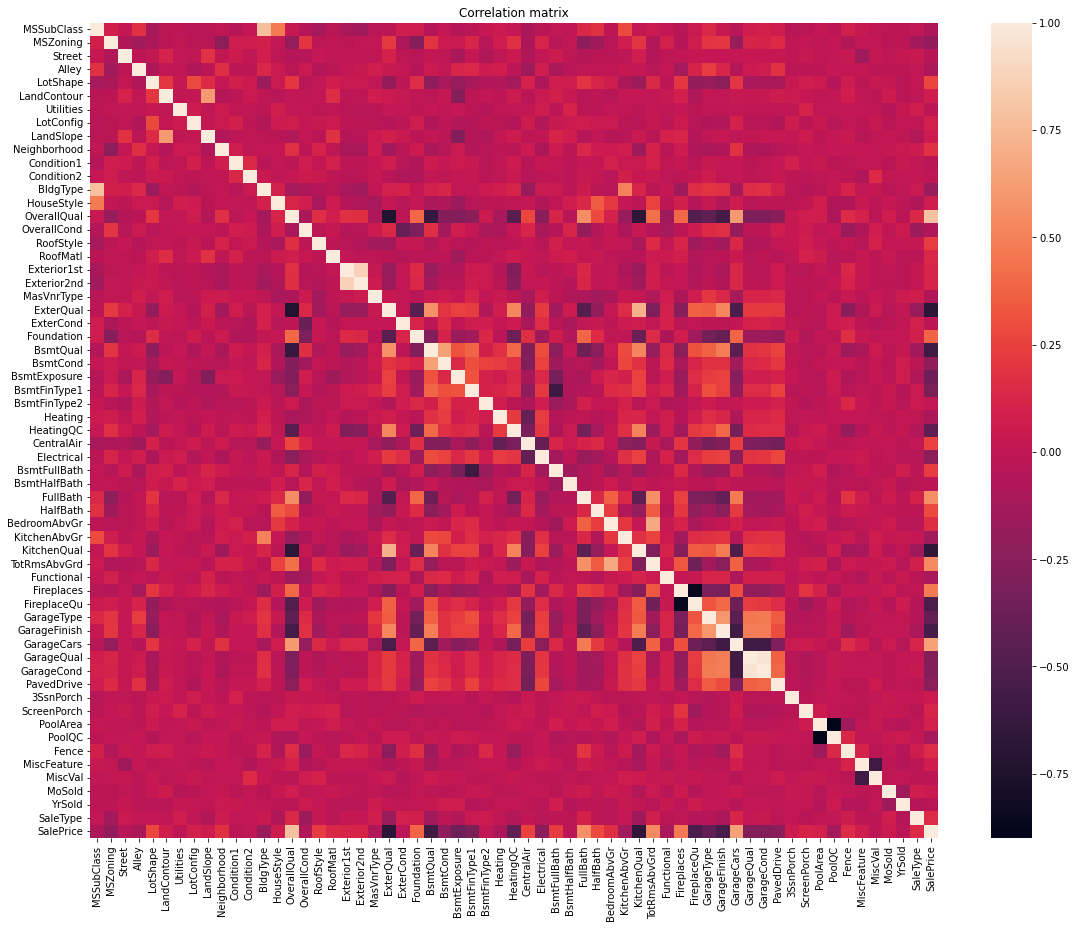

In [244]:
Correlation= df_train.corr()
plt.figure(figsize=(19,15))
sns.heatmap(data=Correlation,annot=False)
plt.title("Correlation matrix");